<a href="https://colab.research.google.com/github/akiwelekar/QuantumSimulations/blob/main/Schrodinger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

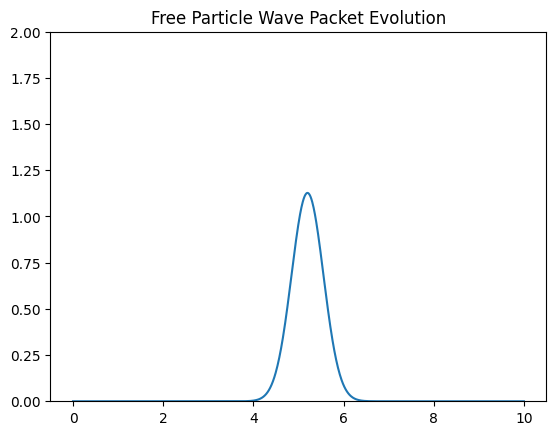

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Constants for the simulation
hbar = 1.0       # Reduced Planck's constant
m = 1.0          # Particle mass
L = 10.0         # Width of the spatial domain
N = 1000         # Number of spatial points
x = np.linspace(0, L, N)
dx = x[1] - x[0]

# Initial wave packet
x0 = 5.0         # Initial position
sigma = 0.5      # Width of the wave packet
k0 = 20.0        # Initial wave number

# Define the initial wave function
psi0 = np.exp(-(x - x0) ** 2 / (2 * sigma ** 2)) * np.exp(1j * k0 * x)
psi0 /= np.sqrt(np.sum(np.abs(psi0) ** 2) * dx)  # Normalize

# Kinetic energy operator in momentum space
k = np.fft.fftfreq(N, d=dx) * 2 * np.pi
T = np.exp(-1j * (hbar ** 2) * k ** 2 / (2 * m) * 0.01)

# Initialize wave function
psi = psi0.copy()

# Time evolution
frames = 200
data = []

for _ in range(frames):
    psi_k = np.fft.fft(psi)
    psi_k *= T
    psi = np.fft.ifft(psi_k)
    data.append(np.abs(psi) ** 2)

# Create animation
fig, ax = plt.subplots()
line, = ax.plot(x, np.abs(psi0) ** 2)
ax.set_ylim(0, 2)
ax.set_title("Free Particle Wave Packet Evolution")

def update(frame):
    line.set_ydata(data[frame])
    return line,

ani = animation.FuncAnimation(fig, update, frames=frames, interval=50)
ani.save("/content/schrodinger_wave_packet.gif", writer="pillow")
